In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input/jigsaw-toxic-comment-classification-challenge/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip


#### Loading the Dataset

In [2]:
train = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
test = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')

In [3]:
print('Train: ',train.shape)
print('Test: ',test.shape)

Train:  (159571, 8)
Test:  (153164, 2)


In [4]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking for null values

In [7]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

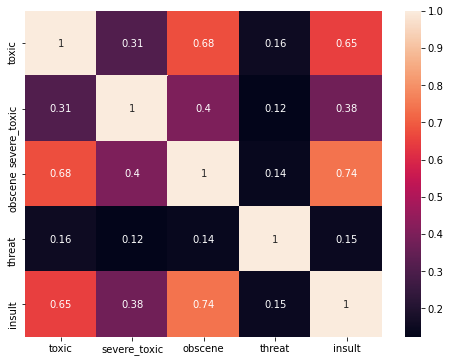

In [9]:
temp=train.iloc[:,2:-1]
corr=temp.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

#### Removing punctuation

In [10]:
import re, string
tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): 
    return tok.sub(r' \1 ', s).split()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Vectorization using word and char analyzer

In [12]:
vectorizer_word = TfidfVectorizer(lowercase = True,tokenizer=tokenize,stop_words="english",max_features=100,analyzer='word')

In [13]:
features_train_word = vectorizer_word.fit_transform(train["comment_text"])
features_test_word = vectorizer_word.transform(test["comment_text"])

In [14]:
vectorizer_char = TfidfVectorizer(lowercase=True,tokenizer=tokenize,stop_words="english",max_features=100,analyzer='char')

In [15]:
features_train_char = vectorizer_char.fit_transform(train["comment_text"])
features_test_char = vectorizer_char.fit_transform(test["comment_text"])

In [16]:
from scipy import sparse
y = train[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
X = sparse.hstack([features_train_word,features_train_char])
x_test = sparse.hstack([features_test_word, features_test_char])

#### Model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
target_label = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

In [19]:
predicted = np.zeros((x_test.shape[0],y.shape[1]))

In [20]:
for i,label in enumerate(target_label):
    lr = LogisticRegression(C=2,random_state = i,class_weight = 'balanced')
    print('Building {} model for column:{''}'.format(i,label)) 
    lr.fit(X,y[label])
    predicted[:,i] = lr.predict_proba(x_test)[:,1]

Building 0 model for column:toxic


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 1 model for column:severe_toxic


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 2 model for column:obscene


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 3 model for column:threat


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 4 model for column:insult


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Building 5 model for column:identity_hate


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
from sklearn.metrics import classification_report
label = 'insult'
y_pred = lr.predict(X)
classification_report(y[label],y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.87      0.92    151694\n           1       0.21      0.70      0.33      7877\n\n    accuracy                           0.86    159571\n   macro avg       0.60      0.78      0.62    159571\nweighted avg       0.94      0.86      0.89    159571\n'

In [22]:
y_predicted_labels = lr.predict_proba(X)[:,1]


#### ROC 

In [23]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y[label], y_predicted_labels)
metrics.auc(fpr, tpr)

0.8695784415081136

#### Submission

In [24]:
test_predicted = pd.DataFrame(predicted,columns=y.columns)
submission = pd.concat([test['id'],test_predicted],axis=1)
submission.to_csv('submit.csv',index=False)


In [25]:
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.835611,0.922629,0.928724,0.020343,0.872977,0.229014
1,0000247867823ef7,0.918844,0.811442,0.951152,0.198778,0.866217,0.919600
2,00013b17ad220c46,0.361171,0.020702,0.251134,0.005874,0.162319,0.736940
3,00017563c3f7919a,0.277270,0.480310,0.641485,0.000023,0.389354,0.002318
4,00017695ad8997eb,0.771637,0.602851,0.855285,0.001849,0.716373,0.129279
